# Classification Problem
A classification problem is predicting whether something is one thing or the other
Classification can be of many type they are:
1) Binary classification - Prediction could be one of two options
2) Multi-class classification - Prediction could be one of many options
3) Multi-label classification - Target can be assigned to more than one options

What we are going to cover in this notebook

| Topic | Contents |
|-------|----------|
| 0. Architecture of a classification neural network | Neural networks can come in almost any shape or size, but they typically follow a similar floor plan. |
| 1. Getting binary classification data ready | Data can be almost anything but to get started we're going to create a simple binary classification dataset. |
| 2. Building a PyTorch classification model | Here we'll create a model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop** specific to classification. |
| 3. Fitting the model to data (training) | We've got data and a model, now let's let the model (try to) find patterns in the (**training**) data. |
| 4. Making predictions and evaluating a model (inference) | Our model's found patterns in the data, let's compare its findings to the actual (**testing**) data. |
| 5. Improving a model (from a model perspective) | We've trained and evaluated a model but it's not working, let's try a few things to improve it. |
| 6. Non-linearity | So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines? |
| 7. Replicating non-linear functions | We used **non-linear functions** to help model non-linear data, but what do these look like? |
| 8. Putting it all together with multi-class classification | Let's put everything we've done so far for binary classification together with a multi-class classification problem. |

## Making classification data and get it ready

We'll use the make_circles() method from Sckit-Learn to generrate two circles with different coloured dots.

In [33]:
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42) # keeping the same randomness


In [34]:
print(f"First 5 X features: {X[:5]}\n")
print(f"First 5 y features: {y[:5]}\n")
X.ndim,y.ndim


First 5 X features: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y features: [1 1 1 1 0]



(2, 1)

There are two X values per label

In [35]:
# making dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


How many values of each class as it is a binary classification


In [36]:
#checking different labels
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

500 for each class

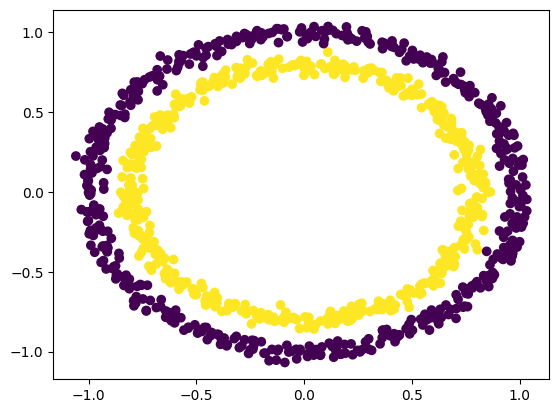

In [37]:
# let's visualize the plot
import matplotlib.pyplot as plt
plt.scatter(x= X[:,0],y= X[:,1],c = y)
plt.show()

In [38]:
#checking the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [39]:
X_sample = X[0]
y_sample = y[0]
X_sample,y_sample,X_sample.shape

(array([0.75424625, 0.23148074]), np.int64(1), (2,))

Turning data into tensors and creating train and test splits

In [40]:
import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

let's split data into train and test sets using sklean

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)# 20% for test set
len(X_train),len(y_train),len(y_test),len(X_train)

(800, 800, 200, 800)

## Building a model
1. Setting up device agnostic code(cuda or cpu)
2. Constructing a model by subclassing nn.Module
3. Defining a loss function and optimizer
4. Creating a training loop

In [42]:
import torch
from torch import nn

device = 'cuda' if torch.cuda.is_available() else "cpu"
device

'cuda'

Lets create a model class that: 
1. Subclasses nn.Module (almost all PyTorch models are subclasses of nn.Module).
2. Creates 2 nn.Linear layers in the constructor capable of handling the input and output shapes of X and y.
3. Defines a forward() method containing the forward pass computation of the model.
4. Instantiates the model class and sends it to the target device.

In [43]:
#creating model
# 1. Construct a model class that subclasees the nn.Module
class CircleModel1V0(nn.Module):
    def __init__(self):
      super().__init__()
      # 2. Here we create 2 nn.Linear layers 
      self.layer_1 = nn.Linear(in_features = 2, out_features=5)
      self.layer_2 = nn.Linear(in_features=5,out_features=1)
    # 3. creating a forward function
    def forward(self,x):# returns the output of the layer_2, a single feature, the same shape as y
       return self.layer_2(self.layer_1(x))
    
#4 . creating an instance
model_0 = CircleModel1V0().to(device)
model_0

CircleModel1V0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [44]:
model_0.eval()
with torch.inference_mode():
    untrained_preds= model_0(X_test.to(device))
untrained_preds 

tensor([[-0.2107],
        [-0.1937],
        [-0.1823],
        [-0.2191],
        [-0.0663],
        [-0.0568],
        [-0.1007],
        [-0.0684],
        [-0.1873],
        [-0.1912],
        [-0.2245],
        [-0.1999],
        [-0.0810],
        [-0.1580],
        [-0.2036],
        [-0.0732],
        [-0.1475],
        [-0.2382],
        [-0.2195],
        [-0.2368],
        [-0.1954],
        [-0.0450],
        [-0.2209],
        [-0.2461],
        [-0.1299],
        [-0.0872],
        [-0.1071],
        [-0.0406],
        [-0.2106],
        [-0.1408],
        [-0.1167],
        [-0.1376],
        [-0.2227],
        [-0.0899],
        [-0.2306],
        [-0.1749],
        [-0.2095],
        [-0.1658],
        [-0.1036],
        [-0.1500],
        [-0.2231],
        [-0.2004],
        [-0.1449],
        [-0.0570],
        [-0.2262],
        [-0.1695],
        [-0.0518],
        [-0.1997],
        [-0.1784],
        [-0.0608],
        [-0.2201],
        [-0.2268],
        [-0.

In [45]:
print(f"Length of predictions: {len(untrained_preds)},Shape : {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape : {y_test.shape}")

Length of predictions: 200,Shape : torch.Size([200, 1])
Length of test samples: 200, Shape : torch.Size([200])


It looks like both test samples and predictions have same length but different shape

In [46]:
loss_fn = torch.nn.BCEWithLogitsLoss() #built in sigmoid
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.1)



In [54]:
#Lets make a function to calculate accuracy
def accuracy_fn(y_true,y_preds): 
    correct = torch.eq(y_true,y_preds).sum().item() # checking whether the two tensor are equal
    accuracy = correct/len(y_preds) * 100
    return accuracy


Before we train our model, it is necessary to know what gets out of the forward function and what does it mean

In [55]:
y_logits = model_0(X_test.to(device))
y_logits[:5]

tensor([[-0.0242],
        [ 0.0012],
        [-0.0505],
        [-0.0169],
        [ 0.0132]], device='cuda:0', grad_fn=<SliceBackward0>)

These are some random values for now as we have not trained our model yet.This is actually the output of the two Linear layers.The raw outputs of this equation(f(x)=wx+b) is often refered to as logits
#
However,these numbers are hard to comprehend,so we need numbers that help us compare our predictions with the label.For that we use an activation function such as sigmoid or tanh or softmax. Here we are going to use sigmoid activation function

In [56]:
y_preds_probs = torch.sigmoid(y_logits)
y_preds_probs[:5]

tensor([[0.4940],
        [0.5003],
        [0.4874],
        [0.4958],
        [0.5033]], device='cuda:0', grad_fn=<SliceBackward0>)

Now all the predictions will be between 0 and 1 .0 indicate that sample belongs to class 0 and 1 indicate that class belongs to class 1
#
More specifically,
- if y_preds_prob >0.5 -> it belongs to class 1
- if y_preds_prob < 0,5 -> it belongs to class 0

To turn them into prediction label we round them

In [57]:
y_preds = torch.round(y_preds_probs)

# In full
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))))

#checking for equality
print(torch.eq(y_preds.squeeze(),y_preds_labels.squeeze()))

# Get rid of the extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

tensor([0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
        1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
        0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
        0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
        0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
        0., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [58]:
y_test[:5]

tensor([1., 0., 1., 0., 1.], device='cuda:0')

### Train Model


In [60]:
torch.manual_seed(42)

epochs = 100

#put data in target device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

# training loop
for e in range(epochs):
    model_0.train()

    #forward pass
    y_logits = model_0(X_train).squeeze() # to remove the extra 1 dimension
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred prob -> probability

    #loss function
    loss = loss_fn(y_logits,y_train)
    acc = accuracy_fn(y_true=y_train,y_preds=y_pred)
    #optimizer 
    optimizer.zero_grad()
    # backprop
    loss.backward()
    #optim steo
    optimizer.step()

    ### testing
    model_0.eval()
    with torch.inference_mode():
        #1 forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        #2 calculate loss
        test_loss = loss_fn(test_logits,test_pred)
        test_acc = accuracy_fn(y_true=y_test,y_preds=test_pred)
    #printing out for every 10 epochs
    if e % 10 == 0:
        print(f"Epoch : {e} | Loss : {loss:.5f} | Accuracy : {acc}%")



Epoch : 0 | Loss : 0.69301 | Accuracy : 50.625%
Epoch : 10 | Loss : 0.69300 | Accuracy : 50.5%
Epoch : 20 | Loss : 0.69300 | Accuracy : 50.875%
Epoch : 30 | Loss : 0.69300 | Accuracy : 50.74999999999999%
Epoch : 40 | Loss : 0.69299 | Accuracy : 51.0%
Epoch : 50 | Loss : 0.69299 | Accuracy : 50.875%
Epoch : 60 | Loss : 0.69299 | Accuracy : 50.5%
Epoch : 70 | Loss : 0.69299 | Accuracy : 51.125%
Epoch : 80 | Loss : 0.69299 | Accuracy : 50.625%
Epoch : 90 | Loss : 0.69299 | Accuracy : 50.875%


We, can clearly see that accuracy is barely 50% so the model is as good as random guessing because it is guessing it could be either

Lets make a plot for our model's prediction , the data  it's trying to predict on and the decision boundary it's creating for whether something is class 0 or class 1

We'll also import plot_predictions() which we wrote in notebook 01 to use later

In [61]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

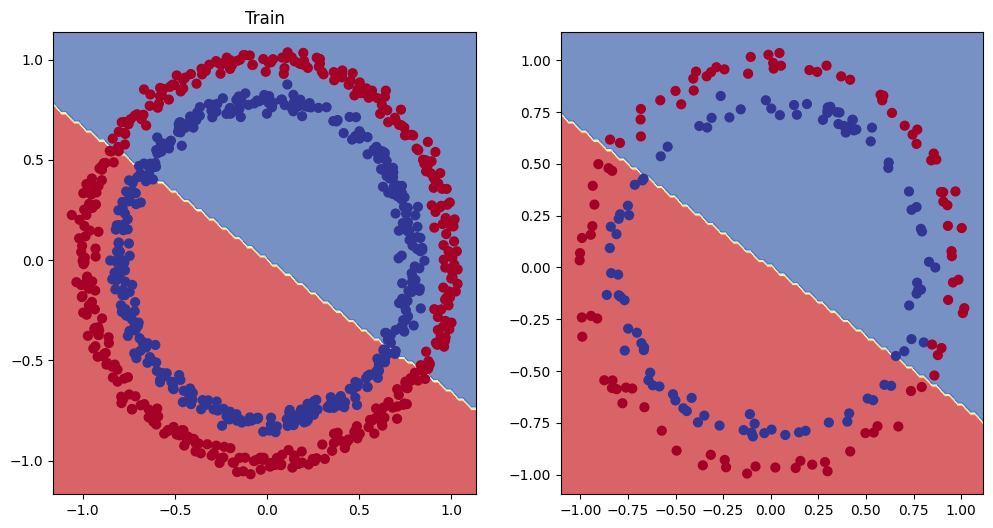

In [63]:
#ploting the decision boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plot_decision_boundary(model_0,X_test,y_test)

It seems that a linear line is trying to classify the model which is impossible as out data points are circular.50% accuracy can be explained now as the best it can do is cut down in the middle

This condition is refered to as  **underfitting**